<a href="https://colab.research.google.com/github/cesarrivera52/Evidencia3/blob/main/Evidencia3_RegresionLinealCostu1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
#César Alejandro Rivera Guzmán  A01567012
#Actividad 4
#Regresión Lineal 1
#Costumer

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from google.colab import files
files.upload()

In [117]:
data=pd.read_csv('costumer_limpio_3.csv')

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           115 non-null    int64  
 1   _record_id                           115 non-null    object 
 2   _title                               115 non-null    object 
 3   _server_updated_at                   115 non-null    object 
 4   _updated_by                          115 non-null    object 
 5   _geometry                            115 non-null    object 
 6   282_payment_method_that_purchase     115 non-null    object 
 7   283_fulfill_needs                    115 non-null    object 
 8   300_did_not_find                     115 non-null    object 
 9   237_distance_household_interviewee   115 non-null    object 
 10  299_means_transportation_consumer    115 non-null    object 
 11  284_additional_products_store   

In [118]:
#Eliminar columnas innecesarias
datam1=data.drop(["Unnamed: 0","_record_id","_title","_server_updated_at","_geometry","_latitude","_longitude"],axis=1)

In [119]:
datam1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   _updated_by                          115 non-null    object
 1   282_payment_method_that_purchase     115 non-null    object
 2   283_fulfill_needs                    115 non-null    object
 3   300_did_not_find                     115 non-null    object
 4   237_distance_household_interviewee   115 non-null    object
 5   299_means_transportation_consumer    115 non-null    object
 6   284_additional_products_store        115 non-null    object
 7   301_electricity_bill                 115 non-null    object
 8   305_electricity_bill_store           115 non-null    object
 9   302_water_bill                       115 non-null    object
 10  306_water_bill_store                 115 non-null    object
 11  303_gas_bill                         115 non-

In [120]:
#Identificar valores nulos por columna
#En este caso es para verificar si hay o existen valores nulos
valores_nulos=datam1.isnull().sum()
valores_nulos

_updated_by                            0
282_payment_method_that_purchase       0
283_fulfill_needs                      0
300_did_not_find                       0
237_distance_household_interviewee     0
299_means_transportation_consumer      0
284_additional_products_store          0
301_electricity_bill                   0
305_electricity_bill_store             0
302_water_bill                         0
306_water_bill_store                   0
303_gas_bill                           0
307_gas_bill_store                     0
286_topups                             0
308_topups_in_store                    0
287_wire_transfers                     0
309_wiretransfers_in_store             0
320_other_services_in_store            0
304_additional_services_store          0
238_frequency_buying_store             0
81_number_online_purchases_month       0
288_number_app_purchases_month         0
289_number_whatsapp_purchases_month    0
83_willingness_ultrafast_delivery      0
84_willingness_s

In [121]:
datam1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   _updated_by                          115 non-null    object
 1   282_payment_method_that_purchase     115 non-null    object
 2   283_fulfill_needs                    115 non-null    object
 3   300_did_not_find                     115 non-null    object
 4   237_distance_household_interviewee   115 non-null    object
 5   299_means_transportation_consumer    115 non-null    object
 6   284_additional_products_store        115 non-null    object
 7   301_electricity_bill                 115 non-null    object
 8   305_electricity_bill_store           115 non-null    object
 9   302_water_bill                       115 non-null    object
 10  306_water_bill_store                 115 non-null    object
 11  303_gas_bill                         115 non-

In [122]:
#Filtro para separar variables cuantitativas
fdatam_cual=datam1.iloc[:,0:18]

In [123]:
#Identificar valores nulos por columna
valores_nulos=fdatam_cual.isnull().sum()
valores_nulos

_updated_by                           0
282_payment_method_that_purchase      0
283_fulfill_needs                     0
300_did_not_find                      0
237_distance_household_interviewee    0
299_means_transportation_consumer     0
284_additional_products_store         0
301_electricity_bill                  0
305_electricity_bill_store            0
302_water_bill                        0
306_water_bill_store                  0
303_gas_bill                          0
307_gas_bill_store                    0
286_topups                            0
308_topups_in_store                   0
287_wire_transfers                    0
309_wiretransfers_in_store            0
320_other_services_in_store           0
dtype: int64

In [124]:
#Filtro para separar variables cuantitativas
fdatam_cuan=datam1.iloc[:,19:25]

In [127]:
#Cargar archivo csv desde seaborn
df=(data5)
df.head(5)

,Predicciones,81_number_online_purchases_month,288_number_app_purchases_month,289_number_whatsapp_purchases_month,83_willingness_ultrafast_delivery,84_willingness_sameday_delivery
0,2.139653,5.0,4.0,2.0,30.0,100.0
1,1.989604,5.0,3.0,0.0,30.0,100.0
2,4.238483,2.0,12.0,2.0,30.0,40.0
3,1.146390,2.0,0.0,1.0,30.0,150.0
4,2.458159,2.0,5.0,1.0,30.0,150.0


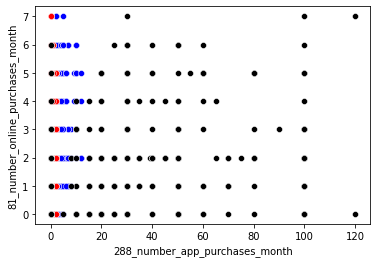

In [128]:
#Se grafican mapas de dispersión de las variables 3 variables:'alcohol', 'speeding' y 'no_previous' al respecto a la variable "total"
from turtle import color

sns.scatterplot(x='288_number_app_purchases_month', y='81_number_online_purchases_month', color="blue", data=df)
sns.scatterplot(x='289_number_whatsapp_purchases_month', y='81_number_online_purchases_month', color="red", data=df)
sns.scatterplot(x='83_willingness_ultrafast_delivery', y='81_number_online_purchases_month', color="black", data=df)

In [129]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep1= df[['288_number_app_purchases_month', '289_number_whatsapp_purchases_month','83_willingness_ultrafast_delivery']]
Var_Dep1= df['81_number_online_purchases_month']

In [130]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model1= LinearRegression()

In [131]:
#Verificamos la función relacionada al modelo
type(model1)

sklearn.linear_model._base.LinearRegression

In [132]:
#Ajustamos el modelo con las variables antes declaradas
model1.fit(X=Vars_Indep1, y=Var_Dep1)


LinearRegression()

In [133]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model1.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['288_number_app_purchases_month',
        '289_number_whatsapp_purchases_month',
        '83_willingness_ultrafast_delivery'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.26235379, -0.05615229,  0.00670704]),
 '_residues': 868.0423833419806,
 'rank_': 3,
 'singular_': array([548.78621298,  55.01953842,  11.6725964 ]),
 'intercept_': 1.0013312872958755}

In [134]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R2 Determinación
model1.score(Vars_Indep1,Var_Dep1)

0.2211494990878139

MODELO PREDICTIVO

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred1= model1.predict(X=df[['288_number_app_purchases_month','289_number_whatsapp_purchases_month','83_willingness_ultrafast_delivery']])
y_pred1

In [139]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones', y_pred1)
df

ValueError: ignored

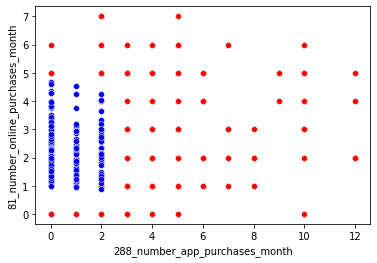

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='288_number_app_purchases_month', y='81_number_online_purchases_month', color="red", data=df)
sns.scatterplot(x='289_number_whatsapp_purchases_month', y='Predicciones', color="blue", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1=model1.score(X=Vars_Indep1, y=Var_Dep1)
coef_Deter1

0.2211494990878139

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl1=np.sqrt(coef_Deter1)
coef_Correl1

0.47026534965678035